In [1]:
using Pkg; Pkg.activate("/Users/gregorywagner/Projects/OceananigansAnalysis")

using OceananigansAnalysis, NetCDF, Glob, PyPlot, JLD2, Printf

usecmbright()

const noutput = 32;

In [10]:
filepath = "./wind_stress_N256_tau0.04_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2"

file = jldopen(filepath, "r")
@show file
iters = parse.(Int, keys(file["timeseries/t"]))
N = file["grid/N"]
L = file["grid/L"]
Fu = file["boundary_conditions/Fu"]
Fb = file["boundary_conditions/Fb"]
Bz = file["initial_condition/Bz"]
close(file)

nt = length(iters)
Δ = L/N
z = range(-Δ/2, step=-Δ/2, length=N)

file = JLDFile /Users/gregorywagner/Desktop/data/wind_stress_N256_tau0.04_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2 (read-only)
 ├─📂 grid
 │  ├─🔢 N
 │  └─🔢 L
 ├─📂 boundary_conditions
 │  ├─🔢 Fb
 │  └─🔢 Fu
 ├─📂 initial_condition
 │  └─🔢 Bz
 ├─📂 timestepping
 │  ├─🔢 dt
 │  └─🔢 tfinal
 ├─📂 constants
 │  ├─🔢 ρ₀
 │  ├─🔢 cP
 │  ├─🔢 g
 │  ├─🔢 α
 │  ├─🔢 f
 │  └─🔢 κ
 └─📂 timeseries
    ├─📂 t
    │  ├─🔢 0
    │  ├─🔢 64800
    │  ├─🔢 129600
    │  ├─🔢 194400
    │  ├─🔢 259200
    │  ├─🔢 324000
    │  ├─🔢 388800
    │  ├─🔢 453600
    │  ├─🔢 518400
    │  ├─🔢 583200
    │  ├─🔢 648000
    │  ├─🔢 712800
    │  ├─🔢 777600
    │  ├─🔢 842400
    │  ├─🔢 907200
    │  ├─🔢 972000
    │  ├─🔢 1036800
    │  ├─🔢 1101600
    │  ├─🔢 1166400
    │  ├─🔢 1231200
    │  ├─🔢 1296000
    │  ├─🔢 1360800
    │  ├─🔢 1425600
    │  ├─🔢 1490400
    │  ├─🔢 1555200
    │  ├─🔢 1620000
    │  ├─🔢 1684800
    │  ├─🔢 1749600
    │  ├─🔢 1814400
    │  ├─🔢 1879200
    │  ├─🔢 1944000
    │  └─🔢 2008800
    ├─📂 U
    │  ├─

-0.1953125:-0.1953125:-50.0

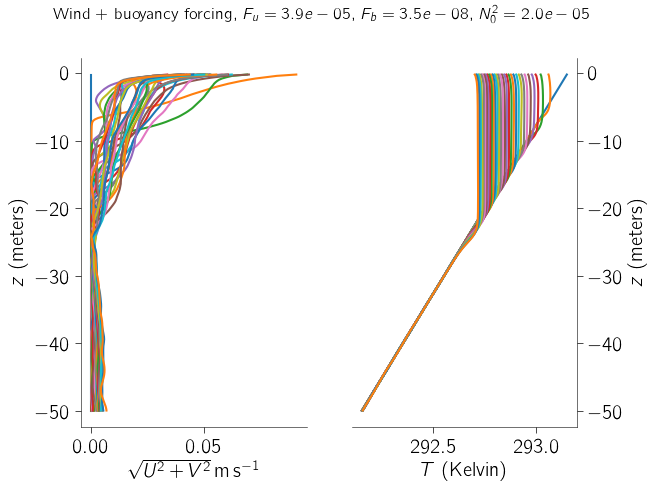

In [16]:
fig, axs = subplots(ncols=2)

removespines("top", "right", ax=axs[1])
removespines("top", "left", ax=axs[2])
axs[2].tick_params(left=false, labelleft=false, right=true, labelright=true)

sca(axs[1])
xlabel(L"\sqrt{U^2 + V^2} \, \mathrm{m \, s^{-1}}")
ylabel("\$ z \$ (meters)")

sca(axs[2])
xlabel("\$ T \$ (Kelvin)")
ylabel("\$ z \$ (meters)")
axs[2].yaxis.set_label_position("right")

titlestr = @sprintf("Wind + buoyancy forcing, \$ F_u = %.1e, \\, F_b = %.1e, \\, N_0^2 = %.1e \$", Fu, Fb, Bz)
fig.suptitle(titlestr)

jldopen(filepath, "r") do file
    for i = 1:nt
        t = file["timeseries/t/$(iters[i])"]
                
        U = dropdims(file["timeseries/U/$(iters[i])"], dims=(1, 2))
        V = dropdims(file["timeseries/V/$(iters[i])"], dims=(1, 2))
        T = dropdims(file["timeseries/T/$(iters[i])"], dims=(1, 2))
        S = dropdims(file["timeseries/S/$(iters[i])"], dims=(1, 2))
                            
        sca(axs[1])
        plot(sqrt.(U.^2 + V.^2), z)
                
        sca(axs[2])
        plot(T, z)
    end
end

savefig("wind_stress_1d_profiles.png", dpi=480)